In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
map_gender = {
    "Male" : 1,
    "Female" : 0
}

In [4]:
df["Gender"] = df["Gender"].map(map_gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [5]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size= 0.25, random_state = 9)

## NonScaler Model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
pred = knn.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

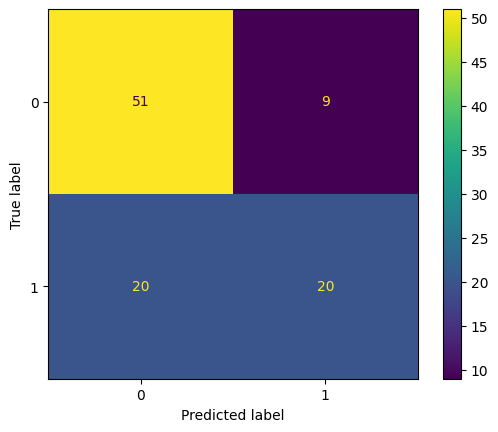

In [14]:
ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test)

In [15]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        60
           1       0.69      0.50      0.58        40

    accuracy                           0.71       100
   macro avg       0.70      0.68      0.68       100
weighted avg       0.71      0.71      0.70       100



## Standart Scaler Model

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

In [23]:
dfScaledX = pd.DataFrame(scaled_X_test)
dfScaledX

,0,1,2,3
0,1.619853,0.973680,-0.901714,0.251494
1,-1.687363,-1.027032,-1.566134,-1.605966
2,-1.065146,0.973680,0.711879,-1.311131
3,-1.102666,-1.027032,-0.237293,0.015626
4,-0.343118,-1.027032,-1.091548,-0.809911
...,...,...,...,...
95,0.798804,-1.027032,1.945803,-1.399581
96,1.447687,-1.027032,0.996631,1.873086
97,1.159034,-1.027032,1.376300,1.991020
98,-1.435438,0.973680,-0.047459,0.133560


In [20]:
X_test

,User ID,Gender,Age,EstimatedSalary
57,15807481,1,28,79000
32,15573452,0,21,16000
17,15617482,1,45,26000
167,15614827,0,35,71000
2,15668575,0,26,43000
...,...,...,...,...
379,15749381,0,58,23000
252,15795298,0,48,134000
320,15774872,0,52,138000
351,15591279,1,37,75000


In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

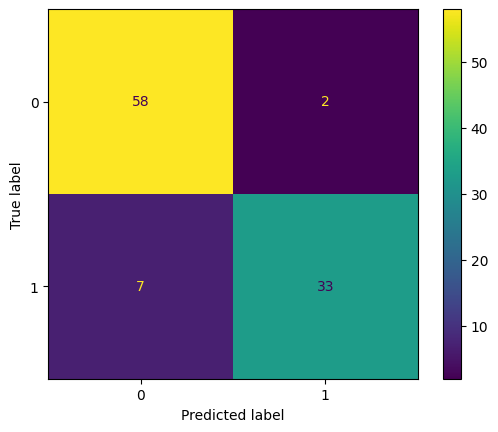

In [25]:
ConfusionMatrixDisplay.from_estimator(knn,scaled_X_test,y_test)

In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        60
           1       0.94      0.82      0.88        40

    accuracy                           0.91       100
   macro avg       0.92      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100

